In [161]:
!pip install indic-nlp-library


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [162]:
!pip install sentence-transformers


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [163]:
model_nam="l3cube-pune/hindi-sentence-similarity-sbert"

In [1]:
from transformers import AutoModel, AutoTokenizer
import torch

tokenizer = AutoTokenizer.from_pretrained('ai4bharat/indic-bert')
model = AutoModel.from_pretrained('ai4bharat/indic-bert')

text = "भारतीय संविधान की महत्वपूर्ण बातें"

inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)

with torch.no_grad():
    outputs = model(**inputs)

embeddings = outputs.last_hidden_state  # or any other layer if you need

mean_embedding = torch.mean(embeddings, dim=1)

mean_embedding_np = mean_embedding.numpy()

print("Shape of embeddings:", mean_embedding_np.shape)


config.json:   0%|          | 0.00/507 [00:00<?, ?B/s]

c:\g\pproject\aimbot\bot\bot\lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Gaurav B V\.cache\huggingface\hub\models--ai4bharat--indic-bert. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


spiece.model:   0%|          | 0.00/5.65M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/135M [00:00<?, ?B/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Shape of embeddings: (1, 768)


In [3]:
sentences = ["तीन कुत्ते बर्फ बीच आदमी सायकल खींचते", "कुत्ते बर्फ बीच आदमी प्रकार साइकिल खींच"]
embeddings = model.encode(sentences)
print(embeddings)

AttributeError: 'AlbertModel' object has no attribute 'encode'

In [ ]:
len

In [166]:
import numpy as np
from numpy.linalg import norm

array1 = embeddings[0]

array2 = embeddings[1]
dot_product = np.dot(array1, array2)

magnitude_array1 = norm(array1)
magnitude_array2 = norm(array2)

cosine_similarity = dot_product / (magnitude_array1 * magnitude_array2)

print("Cosine Similarity:", cosine_similarity)


Cosine Similarity: 0.7746364


In [2]:
import pandas as pd
df=pd.read_csv('final_dataset.csv')
df.head(20)

,0,1,2,4,3
0,How about some testimonies from real health ex...,"Also, who's to say there aren't testimonies fr...",3.0,"['इसके अलावा, कौन कह सकता है कि वहाँ पर ""रियल""...",['असली स्वास्थ्य विशेषज्ञों के कुछ साक्ष्य के ...
1,"""Then the captain was gone.",Then the captain came back.,0.8,['फिर कप्तान वापस आया।'],['तब कप्तान चला गया।']
2,The problem is simpler than that.,The problem is simple.,3.8,['समस्या सरल है।'],['समस्या इससे भी सरल है।']
3,NEGATIVE RECONNAISSANCE REQUIREMENTS.,PACIFIC REQUIREMENTS .,1.0,['समुद्री आवश्यकताएं'],['ऋणात्मक समझौता आवश्यकताएं.']
4,"So, I am dropping, for now, asking you the que...","I am moving on to ask you the question: "" Wher...",0.4,['मैं आपसे यह प्रश्न पूछने के लिए आगे बढ़ रहा ...,['इसलिए अब मैं आपसे यह प्रश्न पूछ रहा हूं कि म...
5,go figure You're asking me to prove a negative?,You're asking me to prove a negative?,4.6,['आप मुझे एक नकारात्मक साबित करने के लिए पूछ र...,['तुम मुझे एक नकारात्मक साबित करने के लिए पूछ ...
6,I am OK with MEDICAL use!,I AM OK WITH MEDICAL USE!!,5.0,['मैं चिकित्सकीय उपयोग के साथ ठीक हूँ!'],['मैं चिकित्सकीय उपयोग के साथ ठीक हूँ!']
7,The prices for everything you need have gone u...,The prices of everything you own IE assets hav...,2.0,['आपके पास आई. ई. आस्तियों की कीमतें घट गई हैं।'],['मुद्रास्फीति के कारण हर चीज की कीमतें बढ़ गई...
8,War in the middle east.,A WAR in the middle east.,5.0,['मध्य पूर्व में एक युद्ध।'],['मध्य पूर्व में युद्ध।']
9,Originally Posted by Vienna How was it authori...,Originally Posted by zaf I give up.,0.6,['मूलतः Posted by zaf I give up.'],['मूलतः विएना द्वारा प्रकाशित How was it autho...


In [3]:
df.shape

(3450, 5)

In [169]:
#Normalizing the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['2'] = scaler.fit_transform(df[['2']])

In [170]:
stopwords_hi = ['तुम','मेरी','मुझे','क्योंकि','हम','प्रति','अबकी','आगे','माननीय','शहर','बताएं','कौनसी','क्लिक','किसकी','बड़े','मैं','and','रही','आज','लें','आपके','मिलकर','सब','मेरे','जी','श्री','वैसा','आपका','अंदर', 'अत', 'अपना', 'अपनी', 'अपने', 'अभी', 'आदि', 'आप', 'इत्यादि', 'इन', 'इनका', 'इन्हीं', 'इन्हें', 'इन्हों', 'इस', 'इसका', 'इसकी', 'इसके', 'इसमें', 'इसी', 'इसे', 'उन', 'उनका', 'उनकी', 'उनके', 'उनको', 'उन्हीं', 'उन्हें', 'उन्हों', 'उस', 'उसके', 'उसी', 'उसे', 'एक', 'एवं', 'एस', 'ऐसे', 'और', 'कई', 'कर','करता', 'करते', 'करना', 'करने', 'करें', 'कहते', 'कहा', 'का', 'काफ़ी', 'कि', 'कितना', 'किन्हें', 'किन्हों', 'किया', 'किर', 'किस', 'किसी', 'किसे', 'की', 'कुछ', 'कुल', 'के', 'को', 'कोई', 'कौन', 'कौनसा', 'गया', 'घर', 'जब', 'जहाँ', 'जा', 'जितना', 'जिन', 'जिन्हें', 'जिन्हों', 'जिस', 'जिसे', 'जीधर', 'जैसा', 'जैसे', 'जो', 'तक', 'तब', 'तरह', 'तिन', 'तिन्हें', 'तिन्हों', 'तिस', 'तिसे', 'तो', 'था', 'थी', 'थे', 'दबारा', 'दिया', 'दुसरा', 'दूसरे', 'दो', 'द्वारा', 'न', 'नहीं', 'ना', 'निहायत', 'नीचे', 'ने', 'पर', 'पर', 'पहले', 'पूरा', 'पे', 'फिर', 'बनी', 'बही', 'बहुत', 'बाद', 'बाला', 'बिलकुल', 'भी', 'भीतर', 'मगर', 'मानो', 'मे', 'में', 'यदि', 'यह', 'यहाँ', 'यही', 'या', 'यिह', 'ये', 'रखें', 'रहा', 'रहे', 'ऱ्वासा', 'लिए', 'लिये', 'लेकिन', 'व', 'वर्ग', 'वह', 'वह', 'वहाँ', 'वहीं', 'वाले', 'वुह', 'वे', 'वग़ैरह', 'संग', 'सकता', 'सकते', 'सबसे', 'सभी', 'साथ', 'साबुत', 'साभ', 'सारा', 'से', 'सो', 'ही', 'हुआ', 'हुई', 'हुए', 'है', 'हैं', 'हो', 'होता', 'होती', 'होते', 'होना', 'होने', 'अपनि', 'जेसे', 'होति', 'सभि', 'तिंहों', 'इंहों', 'दवारा', 'इसि', 'किंहें', 'थि', 'उंहों', 'ओर', 'जिंहें', 'वहिं', 'अभि', 'बनि', 'हि', 'उंहिं', 'उंहें', 'हें', 'वगेरह', 'एसे', 'रवासा', 'कोन', 'निचे', 'काफि', 'उसि', 'पुरा', 'भितर', 'हे', 'बहि', 'वहां', 'कोइ', 'यहां', 'जिंहों', 'तिंहें', 'किसि', 'कइ', 'यहि', 'इंहिं', 'जिधर', 'इंहें', 'अदि', 'इतयादि', 'हुइ', 'कोनसा', 'इसकि', 'दुसरे', 'जहां', 'अप', 'किंहों', 'उनकि', 'भि', 'वरग', 'हुअ', 'जेसा', 'नहिं']
punctuations = ['nn','n', '।','/', '`', '+', '\\', '"', '?', '▁(', '$', '@', '[', '_', "'", '!', ',', ':', '^', '|', ']', '=', '%', '&', '.', ')', '(', '#', '*', '', ';', '-', '}','|','"']

In [9]:
from indicnlp.tokenize import indic_tokenize
def tokenization(indic_string):
    tokens = []
    for t in indic_tokenize.trivial_tokenize(indic_string):
        tokens.append(t)
    return tokens


In [172]:
df['3']=df['3'].apply(lambda x: tokenization(x))
df['4']=df['4'].apply(lambda x: tokenization(x))

In [173]:

to_be_removed =   punctuations

In [174]:

mask = df['3'].apply(lambda x: x not in to_be_removed)
df.loc[mask, '3'] = df.loc[mask, '3'].apply(lambda x: [ele for ele in x if ele not in to_be_removed])

mask = df['4'].apply(lambda x: x not in to_be_removed)
df.loc[mask, '4'] = df.loc[mask, '4'].apply(lambda x: [ele for ele in x if ele not in to_be_removed])

df.tail(10)

,0,1,2,4,3
3440,A man is drawing some figures.,A man is drawing on a digital dry erase board.,0.6666,"[एक, आदमी, एक, डिजिटल, शुष्क, मिटाने, के, बोर्...","[एक, आदमी, कुछ, रेखांकन, कर, रहा, है]"
3441,The monkey is hanging from the trees.,The monkey swung from branch to branch.,0.4000,"[बंदर, branch, to, branch, से, झुका, हुआ, था]","[बंदर, पेड़ों, से, झुक, रहा, है]"
3442,Some children are jumping on Trampoline.,Two boy are playing on a trampoline.,0.6000,"[दो, लड़के, टर्मिनल, पर, खेल, रहे, हैं]","[कुछ, बच्चे, टर्मोलाइन, पर, चढ़, रहे, हैं]"
3443,A woman with a knife is slicing a pepper.,A women slicing green pepper.,0.8000,"[एक, महिला, जो, हरी, पीपल, का, टुकड़ा, काटती, है]","[एक, मादा, चाकू, के, साथ, चावल, का, टुकड़ा, का..."
3444,A man is adding oil to car.,A man is putting anti-freeze into a car.,0.4000,"[एक, आदमी, एक, कार, में, anti, freeze, डाल, रह...","[एक, आदमी, कार, में, तेल, जोड़, रहा, है]"
3445,A man is slicing a carrot by a machine.,A man is climbing a rope.,0.0800,"[एक, आदमी, रस्सी, पर, चढ़, रहा, है]","[एक, आदमी, एक, मशीन, के, द्वारा, carrot, का, ट..."
3446,A boy played a keyboard.,A person is playing a piano keyboard.,0.6400,"[एक, व्यक्ति, एक, 피아노, कीबोर्ड, बजा, रहा, है]","[एक, लड़के, ने, कुंजीपट, बजाया]"
3447,A cat is playing with an antenna.,A boy is playing in the mud.,0.0800,"[एक, लड़का, मिट्टी, में, खेल, रहा, है]","[एक, बिल्ली, एक, एंटिना, से, खेल, रही, है]"
3448,A woman is slicing pumpkin.,A person is slicing cantaloupe.,0.4000,"[एक, व्यक्ति, कंटालूप, का, टुकड़ा, कर, रहा, है]","[एक, महिला, मक्खन, काट, रही, है]"
3449,The people threw the dummy over the cliff edge.,Some people are throwing a dummy off a cliff.,0.9000,"[कुछ, लोग, चट्टान, से, एक, dummy, को, फेंक, रह...","[लोगों, ने, डमी, को, चट्टान, के, किनारे, से, फ..."


In [175]:
def joining(lixt):
    return " ".join(lixt)

In [176]:
df['5']=df['3'].apply(joining)
df['6']=df['4'].apply(joining)

In [177]:
df.head()

,0,1,2,4,3,5,6
0,How about some testimonies from real health ex...,"Also, who's to say there aren't testimonies fr...",0.60,"[इसके, अलावा, कौन, कह, सकता, है, कि, वहाँ, पर,...","[असली, स्वास्थ्य, विशेषज्ञों, के, कुछ, साक्ष्य...",असली स्वास्थ्य विशेषज्ञों के कुछ साक्ष्य के बा...,इसके अलावा कौन कह सकता है कि वहाँ पर रियल स्वा...
1,"""Then the captain was gone.",Then the captain came back.,0.16,"[फिर, कप्तान, वापस, आया]","[तब, कप्तान, चला, गया]",तब कप्तान चला गया,फिर कप्तान वापस आया
2,The problem is simpler than that.,The problem is simple.,0.76,"[समस्या, सरल, है]","[समस्या, इससे, भी, सरल, है]",समस्या इससे भी सरल है,समस्या सरल है
3,NEGATIVE RECONNAISSANCE REQUIREMENTS.,PACIFIC REQUIREMENTS .,0.20,"[समुद्री, आवश्यकताएं]","[ऋणात्मक, समझौता, आवश्यकताएं]",ऋणात्मक समझौता आवश्यकताएं,समुद्री आवश्यकताएं
4,"So, I am dropping, for now, asking you the que...","I am moving on to ask you the question: "" Wher...",0.08,"[मैं, आपसे, यह, प्रश्न, पूछने, के, लिए, आगे, ब...","[इसलिए, अब, मैं, आपसे, यह, प्रश्न, पूछ, रहा, ह...",इसलिए अब मैं आपसे यह प्रश्न पूछ रहा हूं कि मार...,मैं आपसे यह प्रश्न पूछने के लिए आगे बढ़ रहा हू...


In [178]:
from snowballstemmer import stemmer

def hindi_stemming(text):
    stemmer_obj = stemmer("hindi")

    words = text.split()

    stemmed_words = []
    for word in words:
        stemmed_word = stemmer_obj.stemWord(word)
        stemmed_words.append(stemmed_word)

    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

input_text = "तीन, कुत्ते, बर्फ, बीच, आदमी, सायकल, खींचते"
stemmed_text = hindi_stemming(input_text)
print("Stemmed Text:", stemmed_text)


Stemmed Text: तीन, कुत्ते, बर्फ, बीच, आदमी, सायकल, खींच


In [179]:
df['5']=df['5'].apply(hindi_stemming)
df['6']=df['6'].apply(hindi_stemming)

In [180]:
df.head()

,0,1,2,4,3,5,6
0,How about some testimonies from real health ex...,"Also, who's to say there aren't testimonies fr...",0.60,"[इसके, अलावा, कौन, कह, सकता, है, कि, वहाँ, पर,...","[असली, स्वास्थ्य, विशेषज्ञों, के, कुछ, साक्ष्य...",असल स्वास्थ्य विशेषज्ञ क कुछ साक्ष्य क बार म क...,इसक अलाव कौन कह सक है क वह पर रियल स्वास्थ्य व...
1,"""Then the captain was gone.",Then the captain came back.,0.16,"[फिर, कप्तान, वापस, आया]","[तब, कप्तान, चला, गया]",तब कप्तान चल गय,फिर कप्तान वापस आय
2,The problem is simpler than that.,The problem is simple.,0.76,"[समस्या, सरल, है]","[समस्या, इससे, भी, सरल, है]",समस्य इसस भ सरल है,समस्य सरल है
3,NEGATIVE RECONNAISSANCE REQUIREMENTS.,PACIFIC REQUIREMENTS .,0.20,"[समुद्री, आवश्यकताएं]","[ऋणात्मक, समझौता, आवश्यकताएं]",ऋणात्मक समझौत आवश्यक,समुद्र आवश्यक
4,"So, I am dropping, for now, asking you the que...","I am moving on to ask you the question: "" Wher...",0.08,"[मैं, आपसे, यह, प्रश्न, पूछने, के, लिए, आगे, ब...","[इसलिए, अब, मैं, आपसे, यह, प्रश्न, पूछ, रहा, ह...",इसल अब मैं आपस यह प्रश्न पूछ रह हूं क मार्क्स ...,मैं आपस यह प्रश्न पूछ क ल आग बढ़ रह हूंः “ मां...


In [181]:
import numpy as np
from numpy.linalg import norm

# Define the first array
def cosin(embeddings):
    array1 = embeddings[0]

    array2 = embeddings[1]
    dot_product = np.dot(array1, array2)

    magnitude_array1 = norm(array1)
    magnitude_array2 = norm(array2)

    cosine_similarity = dot_product / (magnitude_array1 * magnitude_array2)

    return cosine_similarity

In [1]:
model_nam='3epoch/3epoch'

In [2]:
from sentence_transformers import SentenceTransformer

base_model = SentenceTransformer(model_nam)


c:\g\pproject\aimbot\bot\bot\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("l3cube-pune/hindi-sentence-similarity-sbert")


modules.json: 100%|██████████| 229/229 [00:00<00:00, 76.4kB/s]
c:\g\pproject\aimbot\bot\bot\lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Gaurav B V\.cache\huggingface\hub\models--l3cube-pune--hindi-sentence-similarity-sbert. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
config_sentence_transfor

In [185]:
from sentence_transformers import SentenceTransformer, SentencesDataset, InputExample, losses
from torch.utils.data import DataLoader


train_examples = []
for index, row in df.iterrows():
    train_examples.append(InputExample(texts=[row['5'], row['6']], label=row['2']))

train_dataset = SentencesDataset(train_examples, model)



In [187]:
train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=16)

train_loss = losses.CosineSimilarityLoss(model)
print(train_loss)
model.fit(train_objectives=[(train_dataloader, train_loss)], epochs=3, warmup_steps=0)

CosineSimilarityLoss(
  (model): SentenceTransformer(
    (0): Transformer({'max_seq_length': 512, 'do_lower_case': False}) with Transformer model: BertModel 
    (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  )
  (loss_fct): MSELoss()
  (cos_score_transformation): Identity()
)


In [ ]:
train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=16)

train_loss = losses.CosineSimilarityLoss(model)

model.fit(train_objectives=[(train_dataloader, train_loss)], epochs=3, warmup_steps=0)

In [ ]:
model.eval

<bound method Module.eval of SentenceTransformer(
  (0): Transformer({'max_seq_length': 512, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
)>

In [27]:
import pandas as pd
df=pd.read_csv('360-400.csv')
df.tail()

,0,1,2,4,3
395,Greece to vote on 2013 budget; protesters gather,Greece to vote on 2013 budget,3.6,['ग्रीक 2013 बजट पर मतदान करेगा'],['ग्रीक 2013 बजट पर मतदान करेगा; विरोध करने वा...
396,"U.S., EU Cautiously Welcome Iran's Proposal To...","U.S., EU welcome Iran's offer to restart nucle...",4.0,['अमेरिका और यूरोपीय संघ ईरान के परमाणु वार्ता...,['अमेरिका और यूरोपीय संघ ने परमाणु वार्ताओं को...
397,Clinton warns Kenya of cost of election violence,Clinton warns Kenya on repeat of 2007 vote chaos,2.8,['क्लिंटन ने केन्या को २००७ के मतदान की अव्यवस...,['क्लिंटन ने केन्या को चुनाव हिंसा की लागत के ...
398,Anti-American Protests Over Film Expand to Nea...,Anti-American fury sweeps Middle East over film,3.8,['अमरीकी-विरोधी क्रोध मध्य पूर्व को फिल्म पर फ...,['फिल्म पर अमेरिकी विरोध लगभग 20 देशों तक फैल ...
399,Journalists hail London Olympics opening,Israeli delegation marches in 2012 Olympics op...,1.0,['2012 ओलम्पिक के आरंभ के अवसर पर इजरायल की प्...,['पत्रकार लंदन ओलम्पिक की शुरुआत की सराहना करत...


In [28]:
df['3']=df['3'].apply(lambda x: tokenization(x))
df['4']=df['4'].apply(lambda x: tokenization(x))

In [29]:
mask = df['3'].apply(lambda x: x not in to_be_removed)
df.loc[mask, '3'] = df.loc[mask, '3'].apply(lambda x: [ele for ele in x if ele not in to_be_removed])

mask = df['4'].apply(lambda x: x not in to_be_removed)
df.loc[mask, '4'] = df.loc[mask, '4'].apply(lambda x: [ele for ele in x if ele not in to_be_removed])

df.tail(10)

,0,1,2,4,3
390,BBC director general resigns over 'shoddy jour...,BBC Director General Resigns amid Newsnight Sc...,3.6,"[न्यूजनाइट, स्कैंडल, के, बीच, बीबीसी, के, महान...","[बीबीसी, के, महानिदेशक, ने, ‘छोटी, पत्रकारिता’..."
391,Rick Santorum wins Kansas caucuses,Rick Santorum notches a victory in Kansas cauc...,4.8,"[रिक, संतोरम, ने, कान्सास, के, चुनावों, में, व...","[रिक, सैंटोरम, काँसास, काउकस्स, जीत, गया]"
392,"In Islamist-led Egypt, Coptic Church names new...",Egyptian Christians choose new pope,3.2,"[मिस्र, के, ईसाई, नये, पप, को, चुनते, हैं]","[इस्लामवादी, नेतृत्व, में, मिस्र, में, कोप्टिक..."
393,US pledge to rebuild Haiti not being met,US Pledge to Rebuild Haiti Not Being Met,5.0,"[हाइटी, को, फिर, से, निर्मित, करने, के, लिए, अ...","[संयुक्त, राज्य, अमरीका, का, हैटी, को, पुनः, न..."
394,Chinese stocks close higher Thursday,Chinese stocks open mixed Wednesday,1.0,"[चीनी, स्टॉक, मिश्रित, बुधवार, खुलते, हैं]","[चीन, के, शेयरों, ने, Perşembe, को, उच्चतम, मू..."
395,Greece to vote on 2013 budget; protesters gather,Greece to vote on 2013 budget,3.6,"[ग्रीक, 2013, बजट, पर, मतदान, करेगा]","[ग्रीक, 2013, बजट, पर, मतदान, करेगा, विरोध, कर..."
396,"U.S., EU Cautiously Welcome Iran's Proposal To...","U.S., EU welcome Iran's offer to restart nucle...",4.0,"[अमेरिका, और, यूरोपीय, संघ, ईरान, के, परमाणु, ...","[अमेरिका, और, यूरोपीय, संघ, ने, परमाणु, वार्ता..."
397,Clinton warns Kenya of cost of election violence,Clinton warns Kenya on repeat of 2007 vote chaos,2.8,"[क्लिंटन, ने, केन्या, को, २००७, के, मतदान, की,...","[क्लिंटन, ने, केन्या, को, चुनाव, हिंसा, की, ला..."
398,Anti-American Protests Over Film Expand to Nea...,Anti-American fury sweeps Middle East over film,3.8,"[अमरीकी, विरोधी, क्रोध, मध्य, पूर्व, को, फिल्म...","[फिल्म, पर, अमेरिकी, विरोध, लगभग, 20, देशों, त..."
399,Journalists hail London Olympics opening,Israeli delegation marches in 2012 Olympics op...,1.0,"[2012, ओलम्पिक, के, आरंभ, के, अवसर, पर, इजरायल...","[पत्रकार, लंदन, ओलम्पिक, की, शुरुआत, की, सराहन..."


In [30]:
df['5']=df['3'].apply(joining)
df['6']=df['4'].apply(joining)


In [31]:
df['2'] = scaler.fit_transform(df[['2']])

In [33]:
df.tail(10)

,0,1,2,4,3,5,6
390,BBC director general resigns over 'shoddy jour...,BBC Director General Resigns amid Newsnight Sc...,0.72,"[न्यूजनाइट, स्कैंडल, के, बीच, बीबीसी, के, महान...","[बीबीसी, के, महानिदेशक, ने, ‘छोटी, पत्रकारिता’...",बीबीसी के महानिदेशक ने ‘छोटी पत्रकारिता’ पर त्...,न्यूजनाइट स्कैंडल के बीच बीबीसी के महानिदेशक क...
391,Rick Santorum wins Kansas caucuses,Rick Santorum notches a victory in Kansas cauc...,0.96,"[रिक, संतोरम, ने, कान्सास, के, चुनावों, में, व...","[रिक, सैंटोरम, काँसास, काउकस्स, जीत, गया]",रिक सैंटोरम काँसास काउकस्स जीत गया,रिक संतोरम ने कान्सास के चुनावों में विजय का उ...
392,"In Islamist-led Egypt, Coptic Church names new...",Egyptian Christians choose new pope,0.64,"[मिस्र, के, ईसाई, नये, पप, को, चुनते, हैं]","[इस्लामवादी, नेतृत्व, में, मिस्र, में, कोप्टिक...",इस्लामवादी नेतृत्व में मिस्र में कोप्टिक चर्च ...,मिस्र के ईसाई नये पप को चुनते हैं
393,US pledge to rebuild Haiti not being met,US Pledge to Rebuild Haiti Not Being Met,1.00,"[हाइटी, को, फिर, से, निर्मित, करने, के, लिए, अ...","[संयुक्त, राज्य, अमरीका, का, हैटी, को, पुनः, न...",संयुक्त राज्य अमरीका का हैटी को पुनः निर्माण क...,हाइटी को फिर से निर्मित करने के लिए अमरीका का ...
394,Chinese stocks close higher Thursday,Chinese stocks open mixed Wednesday,0.20,"[चीनी, स्टॉक, मिश्रित, बुधवार, खुलते, हैं]","[चीन, के, शेयरों, ने, Perşembe, को, उच्चतम, मू...",चीन के शेयरों ने Perşembe को उच्चतम मूल्य पर ब...,चीनी स्टॉक मिश्रित बुधवार खुलते हैं
395,Greece to vote on 2013 budget; protesters gather,Greece to vote on 2013 budget,0.72,"[ग्रीक, 2013, बजट, पर, मतदान, करेगा]","[ग्रीक, 2013, बजट, पर, मतदान, करेगा, विरोध, कर...",ग्रीक 2013 बजट पर मतदान करेगा विरोध करने वाले ...,ग्रीक 2013 बजट पर मतदान करेगा
396,"U.S., EU Cautiously Welcome Iran's Proposal To...","U.S., EU welcome Iran's offer to restart nucle...",0.80,"[अमेरिका, और, यूरोपीय, संघ, ईरान, के, परमाणु, ...","[अमेरिका, और, यूरोपीय, संघ, ने, परमाणु, वार्ता...",अमेरिका और यूरोपीय संघ ने परमाणु वार्ताओं को प...,अमेरिका और यूरोपीय संघ ईरान के परमाणु वार्ताओं...
397,Clinton warns Kenya of cost of election violence,Clinton warns Kenya on repeat of 2007 vote chaos,0.56,"[क्लिंटन, ने, केन्या, को, २००७, के, मतदान, की,...","[क्लिंटन, ने, केन्या, को, चुनाव, हिंसा, की, ला...",क्लिंटन ने केन्या को चुनाव हिंसा की लागत के बा...,क्लिंटन ने केन्या को २००७ के मतदान की अव्यवस्थ...
398,Anti-American Protests Over Film Expand to Nea...,Anti-American fury sweeps Middle East over film,0.76,"[अमरीकी, विरोधी, क्रोध, मध्य, पूर्व, को, फिल्म...","[फिल्म, पर, अमेरिकी, विरोध, लगभग, 20, देशों, त...",फिल्म पर अमेरिकी विरोध लगभग 20 देशों तक फैल गया,अमरीकी विरोधी क्रोध मध्य पूर्व को फिल्म पर फैल...
399,Journalists hail London Olympics opening,Israeli delegation marches in 2012 Olympics op...,0.20,"[2012, ओलम्पिक, के, आरंभ, के, अवसर, पर, इजरायल...","[पत्रकार, लंदन, ओलम्पिक, की, शुरुआत, की, सराहन...",पत्रकार लंदन ओलम्पिक की शुरुआत की सराहना करते हैं,2012 ओलम्पिक के आरंभ के अवसर पर इजरायल की प्रत...


In [34]:
lol=df['2']

In [35]:
lol=list(lol)

In [38]:
lol_test=[]
for i, j in zip(df['5'], df['6']):
    embeddings = base_model.encode([i,j])
    lol_test.append(cosin(embeddings))


In [40]:
lol_lol=[list(df['5']),list(df['6'])]

In [41]:
import numpy as np

x = np.array(lol)
y = np.array(lol_test)

mse = np.mean((x - y)**2)

print("The mean squared error is:", mse)

The mean squared error is: 0.0180297284899433


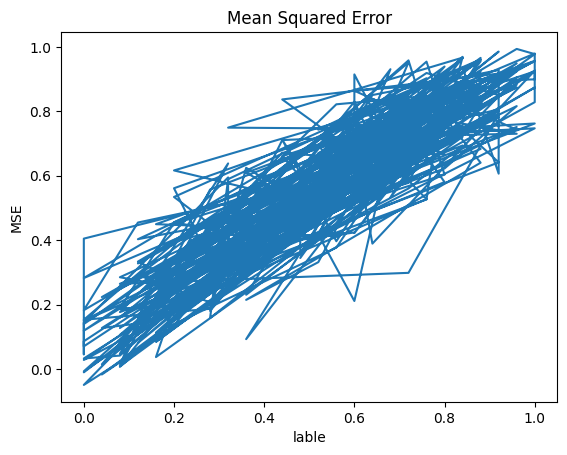

In [42]:
import matplotlib.pyplot as plt

# Create a line plot of the MSE
msee=np.array(mse)
plt.plot(x, y)

# Set the title and labels of the plot
plt.title("Mean Squared Error")
plt.xlabel("lable")
plt.ylabel("MSE")

# Show the plot
plt.show()

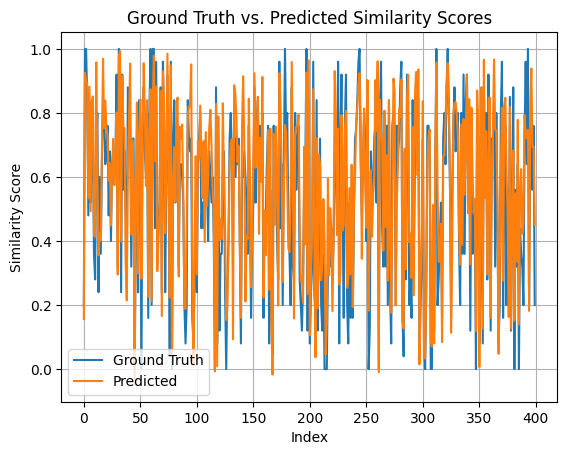

In [74]:
import numpy as np
import matplotlib.pyplot as plt




plt.plot(lol, label='Ground Truth')
plt.plot(lol_test, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Similarity Score')
plt.title('Ground Truth vs. Predicted Similarity Scores')
plt.legend()
plt.grid(True)
plt.show()


In [5]:
import numpy as np
from numpy.linalg import norm

# Define the first array
def cosin(embeddings):
    array1 = embeddings[0]

    array2 = embeddings[1]
    dot_product = np.dot(array1, array2)

    magnitude_array1 = norm(array1)
    magnitude_array2 = norm(array2)

    cosine_similarity = dot_product / (magnitude_array1 * magnitude_array2)

    return cosine_similarity

In [47]:
model=base_model

In [45]:
def inputprocessing(sentance):
    hindi_stemming(sentance[0])
    return [hindi_stemming(sentance[0]),hindi_stemming(sentance[1])]


In [3]:
sentences = ["तीन कुत्त बर्फ बीच आदम सायकल खींच", "कुत्त बर्फ बीच आदम प्रकार साइकिल खींच"]
embeddings = model.encode(inputprocessing(sentences))
print(embeddings)
print(cosin(embeddings))

NameError: name 'model' is not defined

In [4]:
sentences = ["तीन कुत्त बर्फ बीच आदम सायकल खींच", "कुत्त बर्फ बीच आदम प्रकार साइकिल खींच"]
embeddings = base_model.encode(sentences)
print(embeddings)
print(cosin(embeddings))

[[ 0.01087613  0.01652999 -0.00698576 ... -0.00274295  0.00338936
   0.01658385]
 [ 0.03348873  0.01416198  0.01245004 ... -0.00935666  0.00537799
   0.00874114]]


NameError: name 'cosin' is not defined

In [11]:
import numpy as np
from numpy.linalg import norm

# Define the first array
def cosin(embeddings):
    array1 = embeddings[0]

    array2 = embeddings[1]
    dot_product = np.dot(array1, array2)

    magnitude_array1 = norm(array1)
    magnitude_array2 = norm(array2)

    cosine_similarity = dot_product / (magnitude_array1 * magnitude_array2)

    print("Cosine Similarity:", cosine_similarity)
    return cosine_similarity

In [ ]:
df.head()

,0,1,2,4,3,5,6
0,Woman in a black dress walking on the street.,A woman watches a dog jump down the stairs.,0.160,"[महिला, कुत्ता, सीढ़ियों, उछलने, देखती]","[सड़क, घूमते, काले, कपड़े, पहने, महिला]",सड़क घूम काल कपड़ पह महिल,महिल कुत्त सीढ़ उछल देख
1,A man and a woman looking at the camera.,A man and a woman laughing.,0.466,"[आदमी, औरत, हंस]","[पुरुष, महिला, कैमरा, देख]",पुरुष महिल कैमर देख,आदम औरत हंस
2,a brown dog running through the dirty muddy grass,The large brown dog is running outside in the ...,0.720,"[बड़े, भूरे, कुत्ते, बाहर, रेत, दौड़]","[भूरा, कुत्ता, गंदगी, दौड़ता]",भूर कुत्त गंदग दौड़,बड़ भूर कुत्त बाहर रेत दौड़
3,Three dogs pulling a man on a bicycle through ...,"The dogs are pulling a man on a type of bike, ...",1.000,"[कुत्ते, बर्फ, बीच, आदमी, प्रकार, साइकिल, खींच]","[तीन, कुत्ते, बर्फ, बीच, आदमी, सायकल, खींचते]",तीन कुत्त बर्फ बीच आदम सायकल खींच,कुत्त बर्फ बीच आदम प्रकार साइकिल खींच
4,A baby in a red hat sitting in a stroller is h...,A man in a gray shirt sitting in a field of fl...,0.000,"[फूलों, मैदान, बैठा, धूसर, कुर्ता, पहना, आदमी]","[लाल, टोपी, पहने, बच्चे, स्ट्रोलर, बैठा, पुतली...",लाल टोप पह बच्च स्ट्रोलर बैठ पुतल पकड़,फूल मैदान बैठ धूसर कुर्त पह आदम


In [ ]:
df['1'][2]

'The large brown dog is running outside in the dirt.'

In [52]:
sentences = ["भूर कुत्त गंदग दौड़","बड़ भूर कुत्त बाहर रेत दौड़"]
embeddings = model.encode(sentences)
print(embeddings)
print(cosin(embeddings))

[[-4.8504397e-03 -1.9112039e-02  6.2747598e-03 ... -3.2263879e-02
   2.9475363e-03 -4.6662706e-05]
 [-1.6411148e-03 -5.4058325e-03  7.1994155e-03 ... -2.2650052e-02
  -1.0755960e-02  6.6178455e-04]]
Cosine Similarity: 0.80000734
0.80000734


In [53]:
sentences = ["भूर कुत्त गंदग दौड़","बड़ भूर कुत्त बाहर रेत दौड़"]
embeddings = base_model.encode(sentences)
print(embeddings)
print(cosin(embeddings))

[[-4.8504397e-03 -1.9112039e-02  6.2747598e-03 ... -3.2263879e-02
   2.9475363e-03 -4.6662706e-05]
 [-1.6411148e-03 -5.4058325e-03  7.1994155e-03 ... -2.2650052e-02
  -1.0755960e-02  6.6178455e-04]]
Cosine Similarity: 0.80000734
0.80000734


In [37]:
text = "भारत एक बहुत ही विविधताओं से भरा हुआ देश है। यहां विभिन्न भाषाएँ, धर्म, संस्कृति, और लोकसंख्या की विविधता देखने को मिलती है। भारत की विरासत में अनेकता है, जो इसे अनूठा और मनोहारी बनाती है। यहां के लोग अपने विशेष सांस्कृतिक परंपराओं को गर्व से निभाते हैं और एक-दूसरे के साथ सहयोग करते हैं। भारत के विभिन्न क्षेत्रों में अपनी-अपनी विशेषता है, जो इसे एक अद्वितीय देश बनाती है। यहां के राजनीतिक, सामाजिक, और आर्थिक जीवन में भी विविधता दिखाई देती है, जो भारत को एक अनोखा समृद्ध राष्ट्र बनाती है।"
sentences = text.split("।")

print(sentences)

['भारत एक बहुत ही विविधताओं से भरा हुआ देश है', ' यहां विभिन्न भाषाएँ, धर्म, संस्कृति, और लोकसंख्या की विविधता देखने को मिलती है', ' भारत की विरासत में अनेकता है, जो इसे अनूठा और मनोहारी बनाती है', ' यहां के लोग अपने विशेष सांस्कृतिक परंपराओं को गर्व से निभाते हैं और एक-दूसरे के साथ सहयोग करते हैं', ' भारत के विभिन्न क्षेत्रों में अपनी-अपनी विशेषता है, जो इसे एक अद्वितीय देश बनाती है', ' यहां के राजनीतिक, सामाजिक, और आर्थिक जीवन में भी विविधता दिखाई देती है, जो भारत को एक अनोखा समृद्ध राष्ट्र बनाती है', '']


In [17]:
import numpy as np
import networkx as nx

In [18]:
def generate_graph(sentaences):
    G = nx.Graph()
    for i, sent in enumerate(sentences):
        G.add_node(i, sentence=sent)
    for i in range(len(sentences)):
        for j in range(len(sentences)):
            if i != j:
                sim = model.encode([sentences[i],sentences[j]])
                G.add_edge(i, j, weight=abs(cosin(sim)))
    return G

In [19]:
G=generate_graph(sentences)
A = nx.adjacency_matrix(G)

Cosine Similarity: 0.5104542
Cosine Similarity: 0.33102202
Cosine Similarity: 0.7422883
Cosine Similarity: 0.49989834
Cosine Similarity: 0.23813343
Cosine Similarity: 0.69875675
Cosine Similarity: 0.41683632
Cosine Similarity: 0.4092951
Cosine Similarity: 0.4232663
Cosine Similarity: 0.04811454
Cosine Similarity: 0.5104542
Cosine Similarity: 0.42782626
Cosine Similarity: 0.56010747
Cosine Similarity: 0.48803404
Cosine Similarity: 0.5422793
Cosine Similarity: 0.58615714
Cosine Similarity: 0.58203715
Cosine Similarity: 0.57682216
Cosine Similarity: 0.43205234
Cosine Similarity: 0.100515045
Cosine Similarity: 0.33102202
Cosine Similarity: 0.42782626
Cosine Similarity: 0.45167908
Cosine Similarity: 0.54311734
Cosine Similarity: 0.584748
Cosine Similarity: 0.45853925
Cosine Similarity: 0.3635042
Cosine Similarity: 0.70004725
Cosine Similarity: 0.54560614
Cosine Similarity: -0.048536662
Cosine Similarity: 0.7422883
Cosine Similarity: 0.56010747
Cosine Similarity: 0.45167908
Cosine Similarity

C:\Users\Gaurav B V\AppData\Local\Temp\ipykernel_17596\4075869018.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G)


In [289]:
A=np.array(A.todense())
A = A.astype('float64')

In [290]:
hub_scores, auth_scores = nx.hits(sentence_similarity_graph)

katz_scores = nx.katz_centrality(sentence_similarity_graph)

PowerIterationFailedConvergence: (PowerIterationFailedConvergence(...), 'power iteration failed to converge within 1000 iterations')

In [ ]:
sentence_similarity_graph = nx.from_numpy_array(A)
scores = nx.pagerank(sentence_similarity_graph)

In [ ]:
hub_scores, auth_scores = nx.hits(sentence_similarity_graph)

# katz_scores = nx.katz_centrality(sentence_similarity_graph)

print(hub_scores, auth_scores, katz_scores)

{0: 0.09634988790911435, 1: 0.10339985787814414, 2: 0.09704285622425558, 3: 0.11011056175203027, 4: 0.0974890522215604, 5: 0.08787776249586494, 6: 0.11144054862823904, 7: 0.08908462092754584, 8: 0.10000770636159102, 9: 0.09524966962420303, 10: 0.011947475977451412} {0: 0.09634988790911439, 1: 0.1033998578781441, 2: 0.0970428562242556, 3: 0.11011056175203023, 4: 0.09748905222156039, 5: 0.08787776249586494, 6: 0.11144054862823902, 7: 0.08908462092754585, 8: 0.10000770636159104, 9: 0.09524966962420302, 10: 0.011947475977451414} {0: 0.4060381977144081, 1: 0.2903047914816095, 2: 0.2978246362965722, 3: 0.3384284300578256, 4: 0.3271239129700871, 5: 0.40232251316208845, 6: 0.33869723040698485, 7: 0.40501051944830047}


In [ ]:
ranked_sentences = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)
print("Summary:")
for i in range(5):
    print(ranked_sentences[i][1])

Summary:

शिक्षक छात्रों को उनकी कक्षाओं में प्रेरित करने के लिए उन्हें मार्गदर्शन प्रदान करते हैं

शिक्षक अपने छात्रों को शैक्षिक और सामाजिक दृष्टिकोण से प्रेरित करते हैं

छात्र विद्यालय में विभिन्न कक्षाओं में अध्ययन करते हैं

छात्र अपने पाठ्यक्रम के लिए अध्ययन करते हैं ताकि वे परीक्षा में अच्छे अंक प्राप्त कर सकें

परीक्षा के दौरान छात्रों की मेहनत और तैयारी की कमाई का महत्व बढ़ जाता है


removal of redundant sentances


In [55]:
# Assume text is your Hindi paragraph
# text = "भारत एक बहुत ही विविधताओं से भरा हुआ देश है। यहां विभिन्न भाषाएँ, धर्म, संस्कृति, और लोकसंख्या की विविधता देखने को मिलती है। भारत की विरासत में अनेकता है, जो इसे अनूठा और मनोहारी बनाती है। यहां के लोग अपने विशेष सांस्कृतिक परंपराओं को गर्व से निभाते हैं और एक-दूसरे के साथ सहयोग करते हैं। भारत के विभिन्न क्षेत्रों में अपनी-अपनी विशेषता है, जो इसे एक अद्वितीय देश बनाती है। यहां के राजनीतिक, सामाजिक, और आर्थिक जीवन में भी विविधता दिखाई देती है, जो भारत को एक अनोखा समृद्ध राष्ट्र बनाती है।"
text='''वर्ग में शिक्षक छात्रों को नैतिक मूल्यों की सीख देते हैं।
छात्र विद्यालय में विभिन्न कक्षाओं में अध्ययन करते हैं।
परीक्षा के दौरान छात्रों की मेहनत और तैयारी की कमाई का महत्व बढ़ जाता है।
शिक्षक अपने छात्रों को शैक्षिक और सामाजिक दृष्टिकोण से प्रेरित करते हैं।
कक्षा में समूह में काम करने के दौरान छात्रों को टीमवर्क का महत्व समझाया जाता है।
छात्र परीक्षा के प्रश्नों का समाधान करने के लिए अध्ययन से प्रयासरत हैं।
शिक्षक छात्रों को उनकी कक्षाओं में प्रेरित करने के लिए उन्हें मार्गदर्शन प्रदान करते हैं।
प्रत्येक छात्र कक्षा में अपने विचारों को अभिव्यक्ति करने का अवसर प्राप्त करता है।
छात्र अपने पाठ्यक्रम के लिए अध्ययन करते हैं ताकि वे परीक्षा में अच्छे अंक प्राप्त कर सकें।
शिक्षा संस्थानों में छात्रों को समर्पित और उत्साही बनाने का महत्वपूर्ण काम होता है।'''
sentences = text.split("।")

print(sentences)

['वर्ग में शिक्षक छात्रों को नैतिक मूल्यों की सीख देते हैं', '\nछात्र विद्यालय में विभिन्न कक्षाओं में अध्ययन करते हैं', '\nपरीक्षा के दौरान छात्रों की मेहनत और तैयारी की कमाई का महत्व बढ़ जाता है', '\nशिक्षक अपने छात्रों को शैक्षिक और सामाजिक दृष्टिकोण से प्रेरित करते हैं', '\nकक्षा में समूह में काम करने के दौरान छात्रों को टीमवर्क का महत्व समझाया जाता है', '\nछात्र परीक्षा के प्रश्नों का समाधान करने के लिए अध्ययन से प्रयासरत हैं', '\nशिक्षक छात्रों को उनकी कक्षाओं में प्रेरित करने के लिए उन्हें मार्गदर्शन प्रदान करते हैं', '\nप्रत्येक छात्र कक्षा में अपने विचारों को अभिव्यक्ति करने का अवसर प्राप्त करता है', '\nछात्र अपने पाठ्यक्रम के लिए अध्ययन करते हैं ताकि वे परीक्षा में अच्छे अंक प्राप्त कर सकें', '\nशिक्षा संस्थानों में छात्रों को समर्पित और उत्साही बनाने का महत्वपूर्ण काम होता है', '']


In [56]:
len(sentences)

11

In [ ]:
model_name='3epoch/3epoch'

In [57]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer(model_name)


In [179]:
l=[]
l2=[]
for i in range(0,len(sentences)-1):
  for j  in range(i,len(sentences)-1):
    if i!=j:
      embed=  model.encode([tokenization(sentences[i]),tokenization(sentences[j])])
      if cosin(embed)>0.59:
        l.append([i,j,cosin(embed)])
        l2.append(j)
        l2.append(i)

In [180]:
l


[[1, 6, 0.7261712],
 [1, 7, 0.65075105],
 [1, 8, 0.7961841],
 [2, 5, 0.64595836],
 [3, 6, 0.8494293],
 [4, 6, 0.6026735],
 [5, 8, 0.6941158],
 [6, 8, 0.7222426],
 [7, 8, 0.7639309]]

In [181]:
set(l2)

{1, 2, 3, 4, 5, 6, 7, 8}

In [182]:
len(l)

9

In [183]:
import networkx as nx

In [184]:
G2 = nx.Graph()

G2.add_nodes_from(set(l2))

In [185]:
G2.add_edges_from(l)

TypeError: 'numpy.float32' object is not iterable

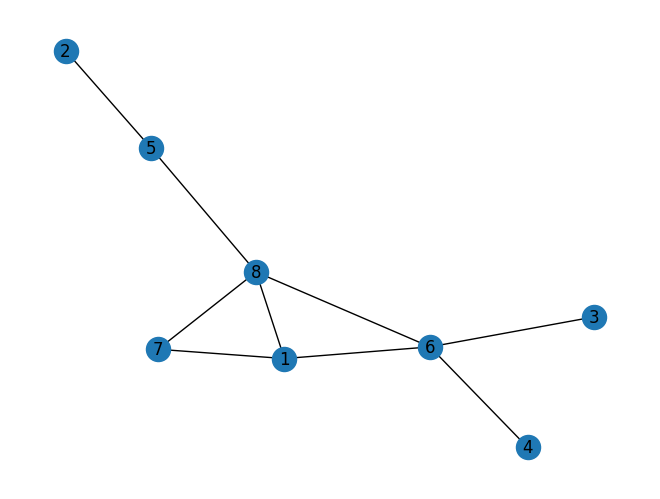

In [163]:
nx.draw(G2, with_labels=True)

In [162]:
print(nx.clustering(G2))

{1: 0.6666666666666666, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0.16666666666666666, 7: 1.0, 8: 0.3333333333333333}


In [164]:
b=nx.degree_centrality(G2)

In [165]:
max(b,key=b.get) 

6

In [166]:
clusters=nx.community.girvan_newman(G2)
next(clusters)

({1, 3, 4, 6, 7, 8}, {2, 5})

In [167]:
main_community=next(clusters)

In [177]:
main_community

({1, 4, 6, 7, 8}, {2, 5}, {3})

In [168]:
includes=[]
for i in main_community:
    print(i)
    max_index=0
    maxx=0
    for j in i:
        if b[j]>maxx:
            maxx=b[j]
            max_index=j
    print(max_index)
    includes.append(max_index)

{1, 4, 6, 7, 8}
6
{2, 5}
5
{3}
3


In [171]:
Final_Summary=[]
for i in range(len(sentences)):
    if i not in  set(l2):
        Final_Summary.append(i)
for i in includes:
    Final_Summary.append(i)

In [172]:
Final_Summary

[0, 9, 10, 6, 5, 3]

In [175]:
Final_Summary.sort()
final_string="|".join([sentences[i] for i in Final_Summary])

In [176]:
final_string

'वर्ग में शिक्षक छात्रों को नैतिक मूल्यों की सीख देते हैं|\nशिक्षक अपने छात्रों को शैक्षिक और सामाजिक दृष्टिकोण से प्रेरित करते हैं|\nछात्र परीक्षा के प्रश्नों का समाधान करने के लिए अध्ययन से प्रयासरत हैं|\nशिक्षक छात्रों को उनकी कक्षाओं में प्रेरित करने के लिए उन्हें मार्गदर्शन प्रदान करते हैं|\nशिक्षा संस्थानों में छात्रों को समर्पित और उत्साही बनाने का महत्वपूर्ण काम होता है|'

In [178]:
def most_valuable_edge(G):
    # Calculate edge betweenness centrality considering weights
    betweenness = nx.edge_betweenness_centrality(G, weight='weight')
    # Find the edge with the highest betweenness centrality
    return max(betweenness, key=betweenness.get)
most_valuable_edge(G2)

(5, 8)